In [1]:
import torch

gradients of equation

In [2]:
from torch.autograd import Variable
a=Variable(torch.Tensor([[1,2],[7,8]]),requires_grad=True)
y=torch.sum(a**3+a**2+3*a+4)
y.backward()
print(a.grad)

tensor([[  8.,  19.],
        [164., 211.]])


Inverse of matrix

In [3]:
def determinant(matrix):
    size=matrix.size(0)
    if size==1:
        return matrix[0,0]
    det=0
    for i in range(size):
        det+=((-1)**i)*matrix[i,0]*determinant(matrix[torch.arange(size)!=i][:,1:])
    return det

In [4]:
def cofactor(matrix):
    size=matrix.size(0)
    cofactors=torch.zeros_like(matrix,dtype=matrix.dtype)
    for i in range(size):
        for j in range(size):
            minor_matrix=matrix[torch.arange(size)!=i][:,torch.arange(size)!=j]
            cofactors[i,j]=((-1)**(i+j))*determinant(minor_matrix)
    return cofactors

In [5]:
def adjoint(matrix):
    cofactors_matrix=cofactor(matrix)
    adjoint_matrix=torch.transpose(cofactors_matrix,0,1)
    return adjoint_matrix

In [6]:

def inverse(matrix):
    det_A=determinant(matrix)
    if det_A==0:
        print("Matrix inverse does not exist")
    adj_A=adjoint(matrix)
    inverse_matrix= adj_A/det_A
    return inverse_matrix


In [7]:
C=[]
s=int(input("Enter the size of the matrix "))
for i in range(s):
    B=[]
    for j in range(s):
        r=float(input("Enter the element "))
        B.append(r)
    C.append(B)
print("Input :",C)
A=torch.tensor(C,dtype=torch.float32)
A_inverse=inverse(A)
print("Matrix A:")
print(A)
print("\nInverse of A:")
print(A_inverse)


Input : [[8.0, 4.0, 5.0, 6.0, 78.0], [2.0, 1.0, 4.0, 5.0, 6.0], [7.0, 4.0, 5.0, 6.0, 6.0], [7.0, 8.0, 4.0, 5.0, 6.0], [7.0, 3.0, 4.0, 3.0, 1.0]]
Matrix A:
tensor([[ 8.,  4.,  5.,  6., 78.],
        [ 2.,  1.,  4.,  5.,  6.],
        [ 7.,  4.,  5.,  6.,  6.],
        [ 7.,  8.,  4.,  5.,  6.],
        [ 7.,  3.,  4.,  3.,  1.]])

Inverse of A:
tensor([[ 5.7831e-03, -3.6540e-01,  4.7008e-01, -1.6995e-01, -5.9483e-02],
        [-4.1308e-03,  1.1814e-01, -3.3577e-01,  2.6425e-01,  4.2488e-02],
        [ 7.6714e-03,  7.8060e-01, -1.2336e+00,  2.2353e-01,  7.7824e-01],
        [-2.4194e-02, -3.0804e-01,  8.9048e-01, -1.6653e-01, -6.0829e-01],
        [ 1.3809e-02,  5.0749e-03, -2.0418e-02,  2.3604e-03,  8.2615e-04]])


Linear Regression

In [2]:
import torch
import torch.nn
import torch.optim

In [3]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.linear=torch.nn.Linear(13,1)
    def forward(self,x):
        return self.linear(x)

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("C:\\Users\\maha9\\OneDrive\\Documents\\datasets\\boston\\boston.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [12]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [17]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import matplotlib.pyplot as plt

In [8]:
st=StandardScaler()
X=torch.tensor(df.iloc[:,:-1].values,dtype=torch.float32)
Y=torch.tensor(df.iloc[:,-1].values,dtype=torch.float32)

In [20]:
X,Y

(tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00,  ..., 1.5300e+01, 3.9690e+02,
          4.9800e+00],
         [2.7310e-02, 0.0000e+00, 7.0700e+00,  ..., 1.7800e+01, 3.9690e+02,
          9.1400e+00],
         [2.7290e-02, 0.0000e+00, 7.0700e+00,  ..., 1.7800e+01, 3.9283e+02,
          4.0300e+00],
         ...,
         [6.0760e-02, 0.0000e+00, 1.1930e+01,  ..., 2.1000e+01, 3.9690e+02,
          5.6400e+00],
         [1.0959e-01, 0.0000e+00, 1.1930e+01,  ..., 2.1000e+01, 3.9345e+02,
          6.4800e+00],
         [4.7410e-02, 0.0000e+00, 1.1930e+01,  ..., 2.1000e+01, 3.9690e+02,
          7.8800e+00]]),
 tensor([24.0000, 21.6000, 34.7000, 33.4000, 36.2000, 28.7000, 22.9000, 27.1000,
         16.5000, 18.9000, 15.0000, 18.9000, 21.7000, 20.4000, 18.2000, 19.9000,
         23.1000, 17.5000, 20.2000, 18.2000, 13.6000, 19.6000, 15.2000, 14.5000,
         15.6000, 13.9000, 16.6000, 14.8000, 18.4000, 21.0000, 12.7000, 14.5000,
         13.2000, 13.1000, 13.5000, 18.9000, 20.0000, 21.0000, 24.

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [10]:
X_train=st.fit_transform(X_train)
X_test=st.fit_transform(X_test)

In [11]:
X_train=torch.tensor(X_train,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)

In [24]:
X_train,X_test

(tensor([[-0.3937,  0.0064, -0.4440,  ..., -1.5125,  0.4341,  0.8876],
         [-0.0821, -0.5136,  1.2840,  ..., -1.7492,  0.4341,  2.3024],
         [-0.3963, -0.5136, -0.1282,  ..., -0.2814,  0.4122,  0.4774],
         ...,
         [-0.4085,  0.2144, -1.4017,  ...,  0.0974,  0.3931, -0.6612],
         [ 2.2616, -0.5136,  1.0656,  ...,  0.8549,  0.4341,  2.6791],
         [-0.3917,  0.3184, -0.5783,  ...,  0.0974,  0.4341, -0.8649]]),
 tensor([[-4.2741e-01, -4.2588e-01, -1.6403e-01,  ...,  8.6937e-04,
           4.5740e-01, -2.0816e-01],
         [-4.3931e-01,  2.1550e+00, -1.1379e+00,  ..., -4.3959e-01,
           3.6388e-01, -1.0965e+00],
         [-4.0452e-01, -4.2588e-01,  1.4519e+00,  ...,  1.1461e+00,
           4.3792e-01,  3.7346e-02],
         ...,
         [ 2.0359e+00, -4.2588e-01,  9.0994e-01,  ...,  7.0560e-01,
           4.0033e-01,  1.3869e+00],
         [-4.1424e-01, -4.2588e-01, -2.6271e-01,  ..., -8.7223e-02,
           4.5237e-01, -1.1876e-01],
         [-4.2064e-

In [12]:
Linear_Model=LinearRegression()

In [13]:
Criterion=torch.nn.MSELoss()
optimizer=torch.optim.SGD(Linear_Model.parameters(),lr=0.01)

In [14]:
train_loss=[]
test_loss=[]
for i in range(1000):
    opts=Linear_Model(X_train)
    loss=Criterion(opts,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        Linear_Model.eval()
        y_pred=Linear_Model(X_test)
        test=Criterion(y_pred,y_test)
    train_loss.append(float(loss.data))
    test_loss.append(float(test.data))

c:\Users\maha9\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([354])) that is different to the input size (torch.Size([354, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\maha9\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([152])) that is different to the input size (torch.Size([152, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [15]:
train_loss

[607.0867309570312,
 586.5490112304688,
 566.8350830078125,
 547.9097900390625,
 529.7400512695312,
 512.294677734375,
 495.54376220703125,
 479.45904541015625,
 464.01336669921875,
 449.18109130859375,
 434.9374084472656,
 421.25872802734375,
 408.12255859375,
 395.50714111328125,
 383.3917541503906,
 371.7563781738281,
 360.5821533203125,
 349.8506164550781,
 339.54412841796875,
 329.6459655761719,
 320.1398010253906,
 311.0101623535156,
 302.24212646484375,
 293.8213195800781,
 285.7339782714844,
 277.9669494628906,
 270.50750732421875,
 263.3434753417969,
 256.4631042480469,
 249.85525512695312,
 243.50904846191406,
 237.4141387939453,
 231.5605926513672,
 225.9388427734375,
 220.53970336914062,
 215.35438537597656,
 210.37437438964844,
 205.59158325195312,
 200.99818420410156,
 196.586669921875,
 192.349853515625,
 188.2808074951172,
 184.37289428710938,
 180.61972045898438,
 177.01515197753906,
 173.55331420898438,
 170.2285919189453,
 167.03550720214844,
 163.96885681152344,
 16

In [16]:
test_loss

[552.1726684570312,
 532.8029174804688,
 514.2151489257812,
 496.3764343261719,
 479.2554626464844,
 462.82257080078125,
 447.0495910644531,
 431.90948486328125,
 417.3766784667969,
 403.426513671875,
 390.03558349609375,
 377.1813659667969,
 364.84222412109375,
 352.99761962890625,
 341.6277160644531,
 330.71356201171875,
 320.23687744140625,
 310.1802062988281,
 300.5268249511719,
 291.2606201171875,
 282.3661193847656,
 273.8284912109375,
 265.6335144042969,
 257.7674865722656,
 250.21734619140625,
 242.97044372558594,
 236.0146942138672,
 229.3384552001953,
 222.9306182861328,
 216.7804718017578,
 210.877685546875,
 205.21243286132812,
 199.77520751953125,
 194.55690002441406,
 189.5487518310547,
 184.74246215820312,
 180.12986755371094,
 175.70327758789062,
 171.45523071289062,
 167.3785858154297,
 163.46653747558594,
 159.7124786376953,
 156.1100616455078,
 152.6532745361328,
 149.3362579345703,
 146.15341186523438,
 143.09942626953125,
 140.1690673828125,
 137.357421875,
 134.65

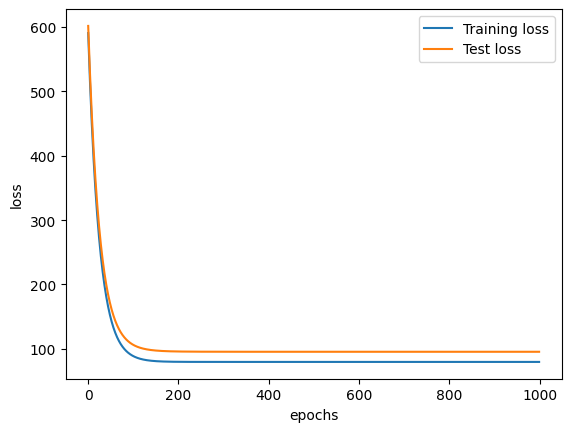

In [28]:
plt.plot(train_loss,label="Training loss")
plt.plot(test_loss,label="Test loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [67]:
train_loss

[591.4343872070312,
 571.3764038085938,
 552.1657104492188,
 533.7562866210938,
 516.1069946289062,
 499.1806945800781,
 482.9430847167969,
 467.3627014160156,
 452.41021728515625,
 438.0582580566406,
 424.2810363769531,
 411.05438232421875,
 398.3553161621094,
 386.1620788574219,
 374.4539489746094,
 363.2111511230469,
 352.4149475097656,
 342.0472717285156,
 332.0909423828125,
 322.5295104980469,
 313.3471374511719,
 304.5287780761719,
 296.059814453125,
 287.926513671875,
 280.11541748046875,
 272.6138000488281,
 265.4093322753906,
 258.4902038574219,
 251.8451385498047,
 245.4632568359375,
 239.33413696289062,
 233.44775390625,
 227.79446411132812,
 222.36509704589844,
 217.1507110595703,
 212.142822265625,
 207.33326721191406,
 202.7141571044922,
 198.27796936035156,
 194.01744079589844,
 189.9256591796875,
 185.99586486816406,
 182.22171020507812,
 178.59701538085938,
 175.1158447265625,
 171.77252197265625,
 168.5615997314453,
 165.4778289794922,
 162.51617431640625,
 159.671768

Torch Operations

In [29]:
import numpy as np

In [30]:
a=torch.zeros(3,1)
a

tensor([[0.],
        [0.],
        [0.]])

In [31]:
b=torch.ones(4,5)
b

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [32]:
c=torch.tensor(range(2,14))
c

tensor([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [33]:
n=np.array([2,3,4,5])
t=torch.tensor(n)
t

tensor([2, 3, 4, 5], dtype=torch.int32)

In [34]:
f=torch.Tensor([[1,2],[3,4]])
f

tensor([[1., 2.],
        [3., 4.]])

In [35]:
g=torch.tensor([[10,20],[30,40]])
g

tensor([[10, 20],
        [30, 40]])

In [36]:
f+g

tensor([[11., 22.],
        [33., 44.]])

In [37]:
f-g

tensor([[ -9., -18.],
        [-27., -36.]])

In [38]:
f*g

tensor([[ 10.,  40.],
        [ 90., 160.]])

In [39]:
g/f

tensor([[10., 10.],
        [10., 10.]])

In [40]:
torch.is_tensor(g)

True

In [41]:
gg=torch.zeros_like(g)
gg

tensor([[0, 0],
        [0, 0]])

In [42]:
torch.eye(10)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [43]:
torch.empty((2,3))

tensor([[1.0675e-22, 1.5414e-42, 2.3694e-38],
        [2.3694e-38, 2.3694e-38, 0.0000e+00]])

In [44]:
g.adjoint()

tensor([[10, 30],
        [20, 40]])

In [45]:
torch.transpose(g,0,1)

tensor([[10, 30],
        [20, 40]])

In [46]:
torch.abs(torch.tensor([-10, 2, -3]))


tensor([10,  2,  3])

In [47]:
torch.cos(torch.tensor([1, 2, 3]))


tensor([ 0.5403, -0.4161, -0.9900])

In [48]:
a1 = torch.randn(4)
a1

tensor([-0.0189, -0.1998,  0.4018, -0.5571])

In [49]:
torch.floor(a1)

tensor([-1., -1.,  0., -1.])